In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
patient = pd.read_csv("patient.csv")

In [3]:
patient.shape

(868, 24)

In [4]:
patient.columns

Index(['id', 'first_name', 'last_name', 'patient_id', 'old_id',
       'date_of_birth', 'sex', 'ethnicity', 'country', 'language', 'insurance',
       'address_line_1', 'address_line_2', 'city', 'state', 'zipcode',
       'phone_primary', 'phone_secondary', 'email', 'created_at', 'updated_at',
       'other_language', 'other_country', 'organization_id'],
      dtype='object')

In [5]:
patient = patient.drop(['id', 'first_name', 'last_name', 'patient_id', 'old_id',
              'address_line_1', 'address_line_2', 'phone_primary', 'phone_secondary', 
              'email', 'updated_at', 'organization_id'], axis=1)

In [6]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 12 columns):
date_of_birth     868 non-null object
sex               868 non-null object
ethnicity         792 non-null object
country           868 non-null object
language          868 non-null object
insurance         868 non-null object
city              868 non-null object
state             868 non-null object
zipcode           868 non-null object
created_at        868 non-null object
other_language    58 non-null object
other_country     73 non-null object
dtypes: object(12)
memory usage: 81.5+ KB


In [7]:
patient.sample(5)

,date_of_birth,sex,ethnicity,country,language,insurance,city,state,zipcode,created_at,other_language,other_country
813,1950-04-29,F,HI,ME,SP,NO,Milwaukee,Wisconsin,53215,2019-05-28 16:00:52.796599+00:00,NaN,NaN
732,1959-08-07,F,NaN,US,EN,MM,Oak Creek,WI,53154,2019-04-17 16:27:12.926395+00:00,NaN,NaN
588,1962-05-19,F,BL,US,EN,PR,Milwaukee,Wisconsin,53206,2019-01-15 16:29:01.652840+00:00,NaN,NaN
174,1968-04-09,M,HI,ME,SP,NO,Milwaukee,WI,53215,2018-04-05 19:03:00.351587+00:00,NaN,NaN
455,1958-06-17,M,BL,US,EN,IN,Milwaukee,WI,53210,2018-09-22 14:00:46.103952+00:00,NaN,NaN


In [8]:
print("Number of patients with null date of birth:", patient['date_of_birth'].isna().sum())

Number of patients with null date of birth: 0


In [9]:
# fixing single error
patient.iloc[861]['date_of_birth'] = '1984-07-06'

def change_to_age(row):
    return (pd.to_datetime('today').year - pd.to_datetime(row['date_of_birth']).year)

patient['age'] = patient.apply(lambda row: change_to_age(row), axis=1)

In [10]:
patient.sample(5)

,date_of_birth,sex,ethnicity,country,language,insurance,city,state,zipcode,created_at,other_language,other_country,age
113,1936-04-23,F,BL,US,EN,ME,Milwaukee,WI,53206,2018-03-14 20:14:10.950745+00:00,NaN,NaN,83
763,1974-09-05,F,HI,ME,SP,NO,Milwaukee,Wisconsin,53215,2019-04-23 17:08:32.054616+00:00,NaN,NaN,45
766,1967-12-29,F,HI,ME,SP,MD,Milwaukee,Wisconsin,53204,2019-04-23 17:43:34.220954+00:00,NaN,NaN,52
622,1992-08-01,M,BL,US,EN,PR,Milwaukee,Wisconsin,53228,2019-01-15 20:40:25.869925+00:00,NaN,NaN,27
775,1970-09-09,F,AS,OT,OT,NO,Milwaukee,WI,53233,2019-04-23 19:57:07.579675+00:00,Burmese,Burma,49


In [11]:
patient = patient.drop(['date_of_birth'], axis=1)

In [12]:
patient['age'].unique()

array([39, 38, 49, 54, 23, 21, 24, 22, 33,  3, 10, 58, 72, 56, 68, 37, 64,
       28, 19, 80, 81, 74, 62, 66, 42, 70, 65, 60, 20, 25, 40, 26, 57, 55,
       51, 53, 35, 50, 71, 86, 67, 52, 45, 27, 32, 46, 29, 59, 47, 36, 63,
       61, 75, 83, 44, 48, 43, 31, 79, 41, 73, 76, 87, 82, 77, 78, 89, 84,
       15, 30, 69, 34,  6, 16, 17, 18])

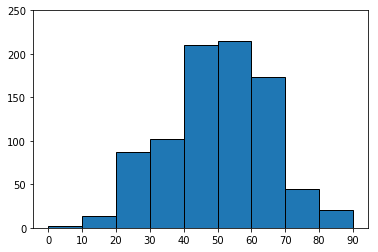

In [13]:
bin_count = 10
bin_width = 10

bins = [x*bin_width for x in range(0, bin_count)] # results in 15, 20, ... 85, 90
plt.hist(patient['age'], bins=bins, edgecolor="k")
plt.xticks(bins)
plt.ylim(0, 250)
plt.show()

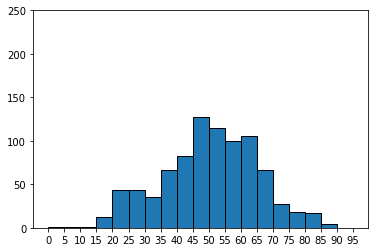

In [14]:
bin_count = 20
bin_width = 5

bins = [x*bin_width for x in range(0, bin_count)] # results in 15, 20, ... 85, 90
plt.hist(patient['age'], bins=bins, edgecolor="k")
plt.xticks(bins)
plt.ylim(0, 250)
plt.show()

In [36]:
sex = patient['sex'].value_counts()
sex

F    531
M    337
Name: sex, dtype: int64

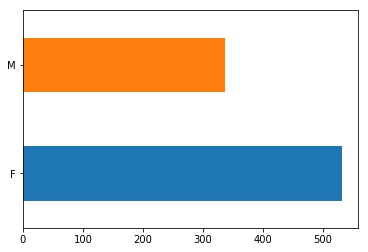

In [38]:
sex.plot.barh()

In [32]:
ethnicity = patient['ethnicity'].value_counts()
ethnicity

HI    318
BL    245
WH    118
AS     96
OT     15
Name: ethnicity, dtype: int64

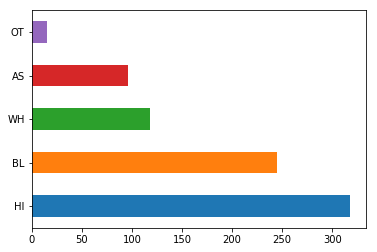

In [35]:
ethnicity.plot.barh()

In [39]:
insurance = patient['insurance'].value_counts()
insurance

NO    343
PR    224
MD    146
ME     59
IN     52
MM     44
Name: insurance, dtype: int64

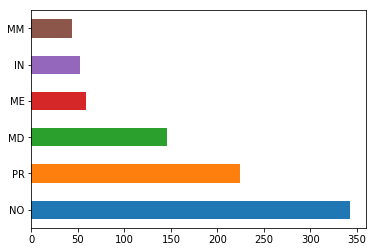

In [40]:
insurance.plot.barh()

In [41]:
from collections import Counter

In [42]:
print(patient.groupby("ethnicity")['insurance'].value_counts().unstack(fill_value=0))

insurance  IN  MD  ME  MM   NO  PR
ethnicity                         
AS          3  32   2   7   28  24
BL         23  62  13  19   55  73
HI          6  18   4   8  242  40
OT          1   5   1   0    2   6
WH         11  13  13   5   12  64


In [44]:
print(patient.groupby("ethnicity")['sex'].value_counts().unstack(fill_value=0))

sex          F    M
ethnicity          
AS          67   29
BL         105  140
HI         241   77
OT           6    9
WH          56   62


In [45]:
print(patient.groupby("insurance")['sex'].value_counts().unstack(fill_value=0))

sex          F    M
insurance          
IN          18   34
MD          68   78
ME          37   22
MM          20   24
NO         271   72
PR         117  107


In [46]:
patient[(patient['ethnicity'] == 'HI') & (patient['sex'] == 'F') & (patient['insurance'] == 'NO')].shape

(203, 12)

In [29]:
patient['language'].value_counts()

EN    504
SP    266
OT     85
BT     13
Name: language, dtype: int64

In [30]:
patient['other_language'].value_counts()

Hmong                         15
Karenni                       13
Burmese                        7
Karinni                        3
Chin                           2
French                         2
Tamil                          2
Vitnamise                      1
Karen                          1
Serbian                        1
Vietnamese                     1
Laos (son speaks English)      1
Navajo                         1
Hmong, Laou, Thai, Enlgish     1
Mally                          1
Itakha Chin                    1
Hmong, Laous, Thai             1
Laotian                        1
Karin                          1
Rohingya                       1
vietnamese                     1
Name: other_language, dtype: int64

---

In [ ]:
survey = pd.read_csv("survey.csv")

In [ ]:
survey.columns